# Classifier Evaluation Lab

* Copy&paste your model for homework5 model
* Add grid search and train
* Compare performance
* Which one is better? Explain?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
X = df.iloc[:, 0]# target 
Y = df.iloc[:, 1:]
print(X)
print(Y)
categorical_data = Y.select_dtypes(include=['object'])# all categorical columns
numeric_data = Y.select_dtypes(exclude=['object']) # all Numeric Columns
print(categorical_data.columns)# categorical column names 
print(numeric_data.columns)# Numerical data column names
numerical_vars = ['age', 'commuting_distance', 'education','satisfaction_with_environment', 'seniority_level','satisfaction_with_job', 'last_raise_pct', 'last_performance_rating','total_years_working', 'years_at_company', 'years_in_current_job','years_since_last_promotion', 'years_with_current_supervisor']
categorical_Vars = ['frequency_of_travel', 'department', 'gender', 'position','married_or_single']

0       No
1       No
2       No
3       No
4       No
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: left_company, Length: 1000, dtype: object
     age frequency_of_travel              department  commuting_distance  \
0     37       Travel_Rarely                   Sales                  16   
1     39       Travel_Rarely  Research & Development                   3   
2     52   Travel_Frequently  Research & Development                  25   
3     50          Non-Travel                   Sales                   1   
4     44       Travel_Rarely  Research & Development                   4   
..   ...                 ...                     ...                 ...   
995   39       Travel_Rarely                   Sales                   3   
996   26       Travel_Rarely                   Sales                   4   
997   18   Travel_Frequently                   Sales                   5   
998   28       Travel_Rarely  Research & Development                   

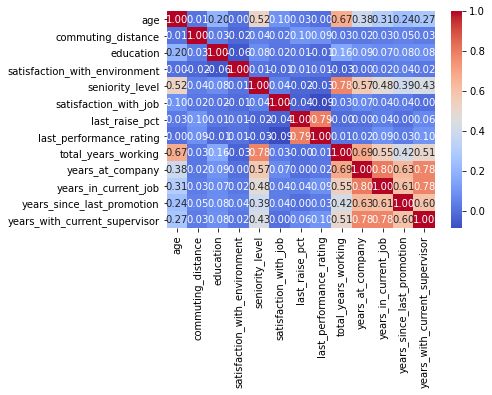

['seniority_level',
 'last_raise_pct',
 'years_at_company',
 'years_with_current_supervisor',
 'years_in_current_job']

[('seniority_level', 'total_years_working'), ('last_raise_pct', 'last_performance_rating'), ('years_at_company', 'years_in_current_job'), ('years_at_company', 'years_with_current_supervisor'), ('years_in_current_job', 'years_with_current_supervisor')]


In [3]:
correlation_matrix = df[numerical_vars].corr() # created a correlation matrix to check the relation between variables.
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")# ploting the matrix
plt.show()
threshold = 0.7 # given a radom threshold value of 0.7
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
# Create a list of variables to drop
print(highly_correlated_pairs)# all the high correlated pairs
variables_ = []# created a empty list to append the numeric column names which are need to be droped
for var1, var2 in highly_correlated_pairs:
    if var1 in variables_:
        variables_.append(var2)
    else:
        variables_.append(var1)


variables_# prints the variables which need to be droped


In [4]:
numeric_data1 = numeric_data.drop(columns=variables_)
numeric_data1

,age,commuting_distance,education,satisfaction_with_environment,satisfaction_with_job,last_performance_rating,total_years_working,years_since_last_promotion
0,37,16,4,4,3,3,9,0
1,39,3,2,3,3,3,11,0
2,52,25,4,3,4,4,31,0
3,50,1,3,4,3,3,19,0
4,44,4,3,4,2,3,10,2
...,...,...,...,...,...,...,...,...
995,39,3,2,4,3,3,12,0
996,26,4,4,4,4,3,8,7
997,18,5,3,2,2,3,0,0
998,28,2,4,1,4,3,5,2


In [5]:
combined_data = pd.concat([numeric_data1, categorical_data], axis=1)# combining both numric and categorical data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(combined_data, X, test_size=0.2, random_state=122)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 13)
(200, 13)
(800,)
(200,)


In [7]:
numrical_column_names = numeric_data1.columns.tolist()
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Standardize numerical features
])

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
pipeline_Categorical_data = Pipeline([# using simple imputer for filling missing values with most_frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore')),#using one_hot_encoder for converting categorical data into numeric data.
])

In [9]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline,numrical_column_names),#numerical data
        ('cat', pipeline_Categorical_data,categorical_Vars)#categorical data
    ])
processed_data = preprocessor.fit_transform(X_train)
processed_data_array = pd.DataFrame(processed_data)
processed_data_array

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.741816,-0.940291,-1.846333,-1.418574,1.221861,-0.438464,2.879700,1.276041,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.681375,-0.452383,0.127036,1.262196,1.221861,-0.438464,-1.173539,-0.323509,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.611628,1.987160,1.113720,0.368606,-1.434359,-0.438464,-0.160230,-0.643419,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.467425,-0.330406,-1.846333,1.262196,-0.548952,2.280691,-1.173539,-0.643419,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.183729,-0.330406,1.113720,-1.418574,1.221861,-0.438464,-1.173539,-0.643419,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.244170,0.767389,0.127036,-0.524984,-0.548952,-0.438464,-0.286893,-0.323509,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
796,-0.718603,1.621229,-1.846333,1.262196,-1.434359,-0.438464,0.093098,0.316311,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
797,0.030220,0.157503,1.113720,-0.524984,1.221861,-0.438464,-0.286893,-0.643419,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,2.169714,1.743206,-0.859648,-1.418574,1.221861,-0.438464,-0.666884,-0.323509,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
lg_pipe = modeling_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),
    ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))])


param_grid = [
  {
    'logreg__C': [1, 10, 100, 1000], 
    'pca__n_components': [1,2,3,4,5,10,15,20]
  }
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, Y_train)
# pipeline.fit(X_train,Y_train)

In [31]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [32]:
gcv_results.best_score_

0.7025

In [33]:
gcv_results.best_params_

{'logreg__C': 10, 'pca__n_components': 20}

In [35]:
Updated_pipeline = gcv_results.best_estimator_


In [46]:
# with logisitic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('preprocessor', preprocessor),('m',LogisticRegression())])# added a logisic regression model to a pipeline
pipeline.fit(X_train,Y_train)
print(pipeline)
from sklearn.metrics import accuracy_score
y_predictions_on_testing_data = pipeline.predict(X_test)
y_predictions_on_traing_data = pipeline.predict(X_train)
Acuracy_testing_data =  accuracy_score(Y_test,y_predictions_on_testing_data)
Acuracy_training_data =  accuracy_score(Y_train,y_predictions_on_traing_data)
print("Accuracy of testing data",Acuracy_testing_data)
print("Accuracy of training data",Acuracy_training_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'satisfaction_with_job',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneH

In [47]:
# After doing grid search and selecting pca and logistic regression 
print(Updated_pipeline.fit(X_train,Y_train))
from sklearn.metrics import accuracy_score
y_predictions_on_testing_data = Updated_pipeline.predict(X_test)
y_predictions_on_traing_data = Updated_pipeline.predict(X_train)
Acuracy_testing_data =  accuracy_score(Y_test,y_predictions_on_testing_data)
Acuracy_training_data =  accuracy_score(Y_train,y_predictions_on_traing_data)
print("Accuracy of testing data",Acuracy_testing_data)
print("Accuracy of training data",Acuracy_training_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'education',
                                                   'satisfaction_with_environment',
                                                   'satisfaction_with_job',
                                                   'last_performance_rating',
                                                   'total_years_working',
                                                   'years_since_last_promotion']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneH

Grid search has a .1 more difference compared to regual logistic regression on testing data  and .1 less on training data.